##### plotting the heatmap of kinship coefficients

In [1]:
from collections import defaultdict
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import allel
import seaborn as sns

import ingenos
#NB: ingenos only used for automatically adding the date to out paths
#can easily be removed

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
md_path = f"{base_path}metadata/"
results_path = f"{base_path}results/"
zarr_path = "/proj/dschridelab/rrlove/aedes/vcf/filtered_110122/"

In [3]:
def return_data(zarr_path, data_type, data_name):
    
    fetch_str = f"{data_type}/{data_name}" 
    
    return da.from_zarr(zarr_path, component=fetch_str)

In [4]:
chroms_dict = defaultdict(dict)

chroms = ["AaegL5_1", "AaegL5_2", "AaegL5_3"]

for chrom in chroms:
    
    temp_in_path = zarr_path + chrom

    chroms_dict[chrom]["pos"] = return_data(temp_in_path, "variants", "POS")
    chroms_dict[chrom]["chrom"] = return_data(temp_in_path, "variants", "CHROM")
    chroms_dict[chrom]["ref"] = return_data(temp_in_path, "variants", "REF")
    chroms_dict[chrom]["alt"] = return_data(temp_in_path, "variants", "ALT")
    chroms_dict[chrom]["ac"] = return_data(temp_in_path, "variants", "AC")
    chroms_dict[chrom]["qd"] = return_data(temp_in_path, "variants", "QD")
    chroms_dict[chrom]["mq"] = return_data(temp_in_path, "variants", "MQ")
    chroms_dict[chrom]["fs"] = return_data(temp_in_path, "variants", "FS")
    chroms_dict[chrom]["mqrs"] = return_data(temp_in_path, "variants", "MQRankSum")
    chroms_dict[chrom]["rprs"] = return_data(temp_in_path, "variants", "ReadPosRankSum")
    chroms_dict[chrom]["sor"] = return_data(temp_in_path, "variants", "SOR")
    chroms_dict[chrom]["is_snp"] = return_data(temp_in_path, "variants", "is_snp")
    chroms_dict[chrom]["numalt"] = return_data(temp_in_path, "variants", "numalt")
    chroms_dict[chrom]["filter_pass"] = return_data(temp_in_path, "variants", "FILTER_PASS")

    chroms_dict[chrom]["gt"] = return_data(temp_in_path, "calldata", "GT")
    chroms_dict[chrom]["gq"] = return_data(temp_in_path, "calldata", "GQ")
    chroms_dict[chrom]["ad"] = return_data(temp_in_path, "calldata", "AD")
    chroms_dict[chrom]["pl"] = return_data(temp_in_path, "calldata", "PL")
    chroms_dict[chrom]["dp"] = return_data(temp_in_path, "calldata", "DP")
    
    print(chrom, chroms_dict[chrom]["gt"].shape)
    
samples = da.from_zarr(temp_in_path, component="samples")

AaegL5_1 (18443972, 131, 2)
AaegL5_2 (32930875, 131, 2)
AaegL5_3 (27660249, 131, 2)


##### read in the metadata

In [5]:
md = pd.read_table(
    md_path + "whole_sample_sorted_country.031522.csv", 
    sep="\t",)

md["locality"] = md["location"].str.split(": ", expand=True)[1]

md["location"] = md["location"].str.replace(": ", "_").str.replace(" ", "_")

md.head()

,sample_id,sample_short,location,sex,batch,sample_id_cat,country,locality
0,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1,Colombia_Rio_Claro,F,1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,Colombia,Rio Claro
1,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,FEMALE_10,Colombia_Rio_Claro,F,1,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,Colombia,Rio Claro
2,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,FEMALE_11,Colombia_Rio_Claro,F,1,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,Colombia,Rio Claro
3,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,FEMALE_12,Colombia_Rio_Claro,F,1,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,Colombia,Rio Claro
4,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,FEMALE_14,Colombia_Rio_Claro,F,1,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,Colombia,Rio Claro


In [6]:
md.shape

(131, 8)

In [7]:
np.sum(~(md["sample_id"] == samples.compute()))

0

##### read in the KING robust results

In [8]:
kingr = pd.read_table(results_path + "popgen/relatedness/chroms_2_3_map_filtered_111022_kingrobust.kin0")

kingr.head()

,FID1,ID1,FID2,ID2,N_SNP,HetHet,IBS0,Kinship
0,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,FEMALE_10-F10_GTGCCATA-ACTAGGAG_S2,53610049,0.0136,0.0064,-0.0655
1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,FEMALE_11-F11_CGTTGCAA-CGCTCTAT_S3,53912230,0.0118,0.0133,-0.3521
2,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,FEMALE_12-F12_TGAAGACG-TGGCATGT_S4,53928647,0.0104,0.0137,-0.4020
3,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,FEMALE_14-F14_ACGTTCAG-GCACAACT_S6,53694917,0.0109,0.0119,-0.3195
4,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_1-F1_CGCATGAT-TCAGGCTT_S1,FEMALE_15-F15_ATGCACGA-GACGATCT_S7,FEMALE_15-F15_ATGCACGA-GACGATCT_S7,53653288,0.0107,0.0119,-0.3234


In [9]:
len(kingr["ID1"].unique())

130

In [10]:
kingr.drop(columns=["FID1", "FID2"], inplace=True)

kingr["ID1"] = kingr["ID1"].str.split("-", expand=True)[0]
kingr["ID2"] = kingr["ID2"].str.split("-", expand=True)[0]

kingr.head()

,ID1,ID2,N_SNP,HetHet,IBS0,Kinship
0,FEMALE_1,FEMALE_10,53610049,0.0136,0.0064,-0.0655
1,FEMALE_1,FEMALE_11,53912230,0.0118,0.0133,-0.3521
2,FEMALE_1,FEMALE_12,53928647,0.0104,0.0137,-0.4020
3,FEMALE_1,FEMALE_14,53694917,0.0109,0.0119,-0.3195
4,FEMALE_1,FEMALE_15,53653288,0.0107,0.0119,-0.3234


In [11]:
kingr = pd.merge(kingr, md[["sample_short", "location"]], 
                 left_on="ID1", right_on="sample_short")

kingr = pd.merge(kingr, md[["sample_short", "location"]], 
                 left_on="ID2", right_on="sample_short")

kingr.rename(columns = {"location_x" : "sample_1_location",
                      "location_y" : "sample_2_location"}, inplace=True)

kingr.drop(columns=["sample_short_x", "sample_short_y"], inplace=True)

kingr.head()

,ID1,ID2,N_SNP,HetHet,IBS0,Kinship,sample_1_location,sample_2_location
0,FEMALE_1,FEMALE_10,53610049,0.0136,0.0064,-0.0655,Colombia_Rio_Claro,Colombia_Rio_Claro
1,FEMALE_1,FEMALE_11,53912230,0.0118,0.0133,-0.3521,Colombia_Rio_Claro,Colombia_Rio_Claro
2,FEMALE_10,FEMALE_11,57293761,0.0170,0.0081,-0.0084,Colombia_Rio_Claro,Colombia_Rio_Claro
3,FEMALE_1,FEMALE_12,53928647,0.0104,0.0137,-0.4020,Colombia_Rio_Claro,Colombia_Rio_Claro
4,FEMALE_10,FEMALE_12,57220570,0.0132,0.0126,-0.1803,Colombia_Rio_Claro,Colombia_Rio_Claro


In [12]:
len(kingr["ID1"].unique())

130

##### add country and locality names

In [13]:
temp1 = kingr[["ID1", "sample_1_location"]].rename(
    columns = {"ID1" : "sample", "sample_1_location" : "location"})

temp1.head()

,sample,location
0,FEMALE_1,Colombia_Rio_Claro
1,FEMALE_1,Colombia_Rio_Claro
2,FEMALE_10,Colombia_Rio_Claro
3,FEMALE_1,Colombia_Rio_Claro
4,FEMALE_10,Colombia_Rio_Claro


In [14]:
temp2 = kingr[["ID2", "sample_2_location"]].rename(
    columns = {"ID2" : "sample", "sample_2_location" : "location"})

temp2.head()

,sample,location
0,FEMALE_10,Colombia_Rio_Claro
1,FEMALE_11,Colombia_Rio_Claro
2,FEMALE_11,Colombia_Rio_Claro
3,FEMALE_12,Colombia_Rio_Claro
4,FEMALE_12,Colombia_Rio_Claro


In [15]:
temp1.shape, temp2.shape

((8515, 2), (8515, 2))

In [16]:
id_mappings = pd.concat([temp1, temp2])

id_mappings.drop_duplicates(inplace=True)

id_mappings.reset_index(drop=True, inplace=True)

id_mappings["by_loc_id"] = id_mappings.groupby("location").cumcount()

id_mappings["new_id"] = \
id_mappings["location"] + "_" + id_mappings["by_loc_id"].map(str)

id_mappings.head()

,sample,location,by_loc_id,new_id
0,FEMALE_1,Colombia_Rio_Claro,0,Colombia_Rio_Claro_0
1,FEMALE_10,Colombia_Rio_Claro,1,Colombia_Rio_Claro_1
2,FEMALE_11,Colombia_Rio_Claro,2,Colombia_Rio_Claro_2
3,FEMALE_12,Colombia_Rio_Claro,3,Colombia_Rio_Claro_3
4,FEMALE_14,Colombia_Rio_Claro,4,Colombia_Rio_Claro_4


In [17]:
kingr = pd.merge(kingr, id_mappings[["sample", "new_id"]], 
                 left_on = "ID1", right_on = "sample")
kingr = pd.merge(kingr, id_mappings[["sample", "new_id"]], 
                 left_on = "ID2", right_on = "sample")

kingr.rename(columns = {"new_id_x" : "new_id_1",
                       "new_id_y" : "new_id_2"}, inplace=True)

kingr.drop(columns = ["sample_x", "sample_y"], inplace=True)

kingr.head()

,ID1,ID2,N_SNP,HetHet,IBS0,Kinship,sample_1_location,sample_2_location,new_id_1,new_id_2
0,FEMALE_1,FEMALE_10,53610049,0.0136,0.0064,-0.0655,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro_0,Colombia_Rio_Claro_1
1,FEMALE_1,FEMALE_11,53912230,0.0118,0.0133,-0.3521,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro_0,Colombia_Rio_Claro_2
2,FEMALE_10,FEMALE_11,57293761,0.0170,0.0081,-0.0084,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro_1,Colombia_Rio_Claro_2
3,FEMALE_1,FEMALE_12,53928647,0.0104,0.0137,-0.4020,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro_0,Colombia_Rio_Claro_3
4,FEMALE_10,FEMALE_12,57220570,0.0132,0.0126,-0.1803,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro_1,Colombia_Rio_Claro_3


In [18]:
kinship_table = \
kingr.sort_values(["sample_1_location","sample_2_location"])\
.set_index(["sample_1_location", "sample_2_location"])\
[["ID1","ID2","Kinship"]]\
.pivot_table(index=["ID1","sample_1_location"], 
             columns=["ID2","sample_2_location"],
            values = "Kinship").T

kinship_table.head()

,ID1,FEMALE_1,FEMALE_10,FEMALE_11,FEMALE_12,FEMALE_14,FEMALE_15,FEMALE_17,FEMALE_18,FEMALE_2,FEMALE_20,...,SRR6768018,SRR6768019,SRR6768020,SRR6768021,SRR6768022,SRR6768023,SRR6768024,SRR6768025,SRR6768026,SRR6768027
,sample_1_location,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,Colombia_Rio_Claro,...,USA_San_Diego,USA_Clovis,USA_Clovis,USA_Clovis,USA_Clovis,USA_Sanger,USA_Exeter,USA_Clovis,USA_Clovis,USA_Fresno
ID2,sample_2_location,,,,,,,,,,,,,,,,,,,,,
FEMALE_10,Colombia_Rio_Claro,-0.0655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEMALE_11,Colombia_Rio_Claro,-0.3521,-0.0084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEMALE_12,Colombia_Rio_Claro,-0.4020,-0.1803,-0.0465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEMALE_14,Colombia_Rio_Claro,-0.3195,-0.1135,-0.1008,0.0680,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEMALE_15,Colombia_Rio_Claro,-0.3234,-0.0706,0.0366,-0.0397,-0.0332,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#outString = ingenos.make_date_stamp(results_path + \
#                                    "popgen/relatedness_heatmap_with_specimen_names", 
#                                    ".pdf")

#outString

Text(0.5, 1.0, 'Kinship coefficient among 131 specimens')

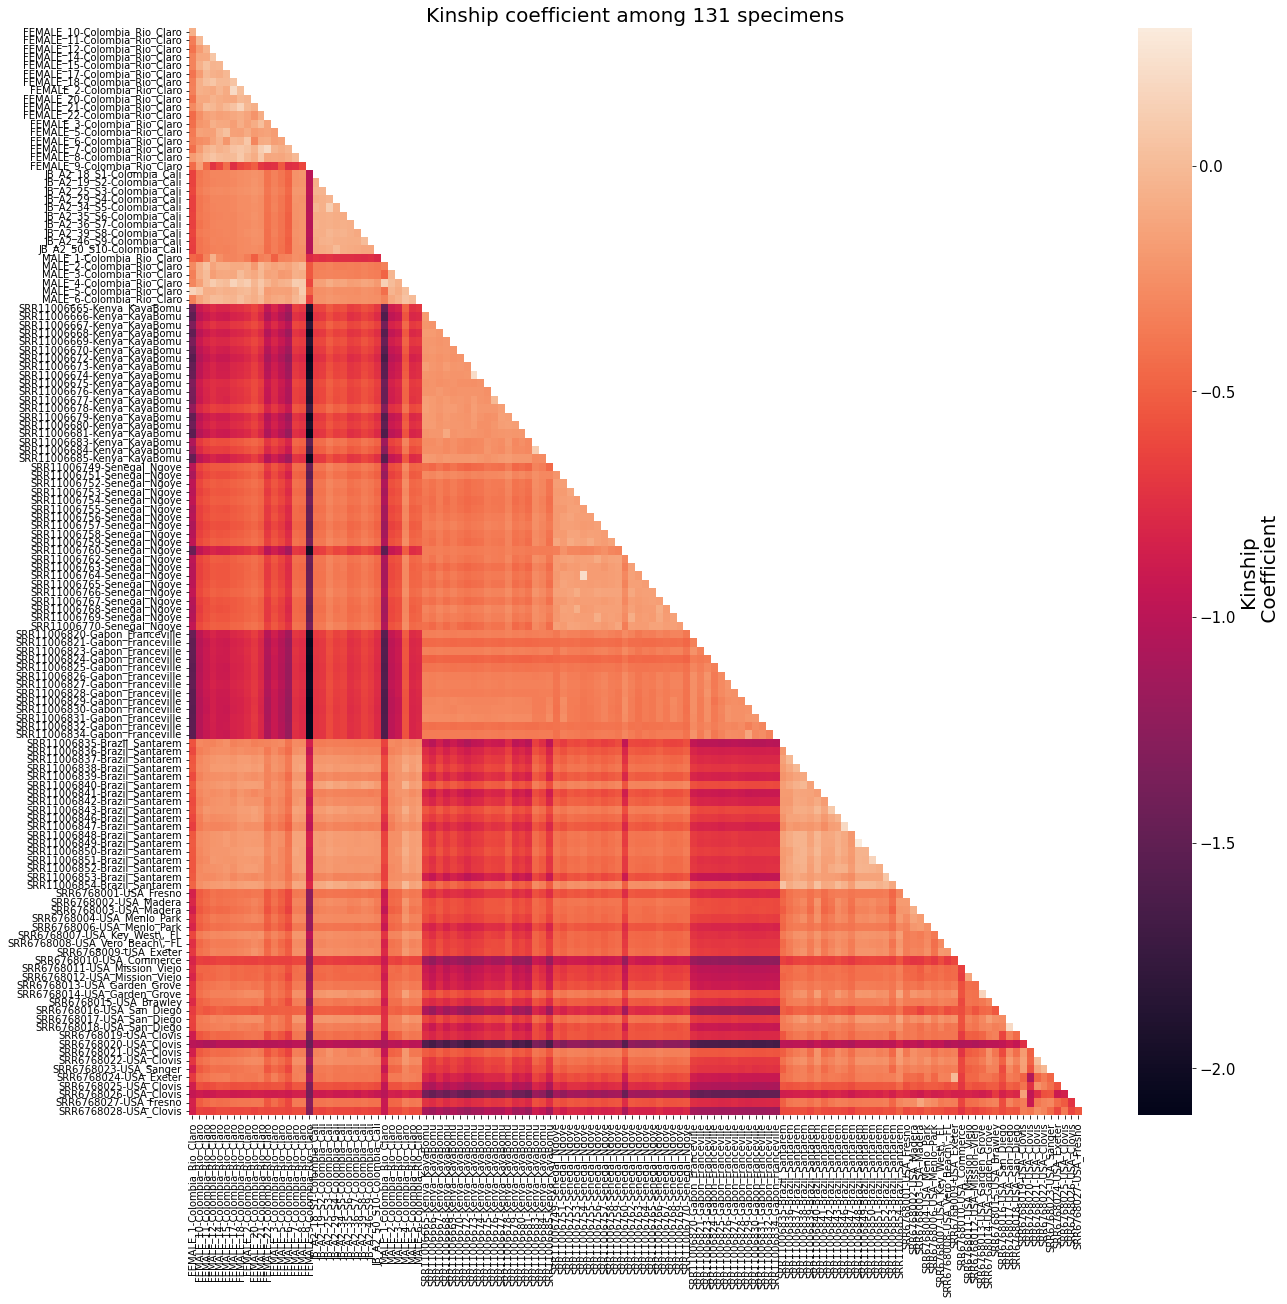

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(kinship_table, ax=ax, 
            xticklabels=True,
            yticklabels=True,
            cbar_kws = {"label" : "Kinship\n Coefficient"})
                        
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.figure.axes[-1].tick_params(labelsize=15)

ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Kinship coefficient among 131 specimens", fontsize=20)

#plt.savefig(outString, bbox_inches="tight")